# **Exercício 02**

## Imports

In [54]:

import numpy as np
from numpy.lib import scimath as SM     # Yet to applicate
import matplotlib.pyplot as plt
from cycler import cycler
from termcolor import colored
import pandas as pd
import dslab as ds

%matplotlib inline     
# Sets the backend of matplotlib of the 'inline' backend

## Parâmetros

In [55]:
nf = 1.5
ns = 1.49
nc = 1.0
a = 5e-6
lmbd = 1.55e-6
c0 = 299792458
k0 = 2*np.pi/lmbd
n_diff = nf - ns

pc = (nf**2)/(nc**2)
ps = (nf**2)/(ns**2)

AbNum = np.sqrt(nf**2-ns**2)
V = a*k0*AbNum
delta = (ns**2 - nc**2)/(nf**2 - ns**2)

colors = ['b', 'g', 'r', 'y', 'c', 'blue','k']
u0 = 4*np.pi*1e-7
e0 = 1/(u0 * c0**2)

In [56]:
neff = np.linspace(ns,nf,1000)
beta = neff*k0
u = a*k0*np.sqrt(nf**2-neff**2)
v = a*k0*np.sqrt(neff**2-ns**2)
w = a*k0*np.sqrt(neff**2-nc**2)

In [57]:
lim = [k0*nf, k0*ns]
print('Limites de beta (máximo, mínimo) = ', end='')
print(lim)
print(f'Abertura numérica = {AbNum}')

Limites de beta (máximo, mínimo) = [6080501.910173793, 6039965.230772634]
Abertura numérica = 0.17291616465790594


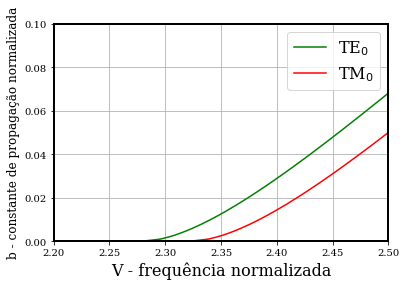

In [58]:
m = 1
b = np.linspace(0, .99, 1000)
Vte = (m*np.pi + np.arctan(np.sqrt((b + delta)/(1 - b))) + np.arctan(np.sqrt(b/(1 - b))))/(2*np.sqrt(1 - b))
Vtm = (m*np.pi + np.arctan(pc*np.sqrt((b + delta)/(1 - b))) + np.arctan(ps*np.sqrt(b/(1 - b))))/(2*np.sqrt(1 - b))

plt.plot(Vte, b, label = 'TE$_0$', color = colors[1])
plt.plot(Vtm, b, label = 'TM$_0$', color = colors[2])
plt.xlabel('V - frequência normalizada', fontsize = 16)
plt.ylabel('b - constante de propagação normalizada', fontsize = 12)
plt.xlim([2.2,2.5])
plt.ylim([0,0.1])
plt.legend(fontsize = 16)
plt.grid(True)

# Modo TE

In [59]:
leftTE = u*(v+w)/(u**2-v*w)
leftTE[:-1][np.diff(leftTE) < -5] = np.nan    # NaN = Not a Number

rightTE = np.tan(2*u)
rightTE[:-1][np.diff(rightTE) < -5] = np.nan    # NaN = Not a Number

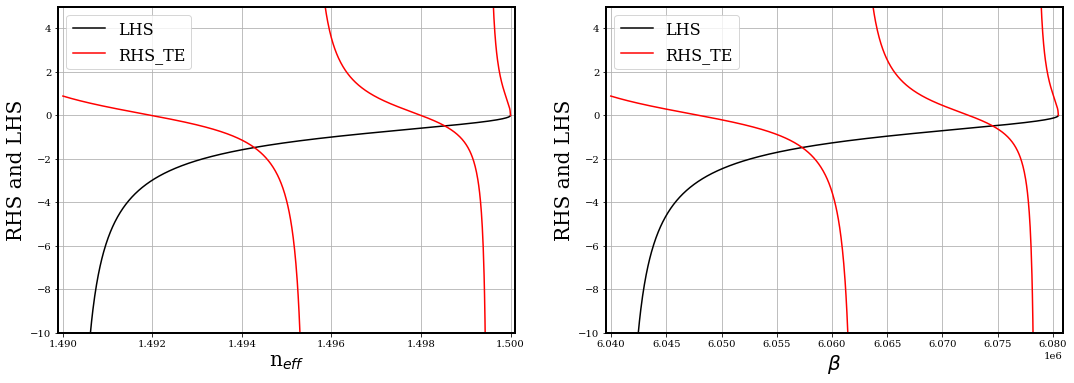

In [60]:
vFc = 0.01  # View factor for graphing (set to 0 for original view)

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

figure1, axs = plt.subplots(1, 2, figsize=(18,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)

axs[0].plot(neff, leftTE, label = 'LHS', color = colors[6])
axs[0].plot(neff, rightTE, label = 'RHS_TE', color = colors[2])
axs[0].set_xlabel(r'n$_{eff}$', fontsize = 20)
axs[0].set_ylabel(r'RHS and LHS', fontsize = 20)
axs[0].set_xlim([ns - n_diff*vFc ,  nf + n_diff*vFc])
axs[0].set_ylim([-10,5])
axs[0].legend(loc = 'upper left', fontsize = 16)
axs[0].grid(True)

axs[1].plot(beta, leftTE, label = 'LHS', color = colors[6])
axs[1].plot(beta, rightTE, label = 'RHS_TE', color = colors[2])
axs[1].set_xlabel(r'$\beta$', fontsize = 20)
axs[1].set_ylabel(r'RHS and LHS', fontsize = 20)
axs[1].set_xlim([ns*k0 - n_diff*k0*vFc ,  nf*k0 + n_diff*k0*vFc])
axs[1].set_ylim([-10,5])
axs[1].legend(loc = 'upper left', fontsize = 16)
axs[1].grid(True)

In [61]:
beta_gráfico = 5.93e6
print(f'kf = {np.sqrt((k0*nf)**2 - beta_gráfico**2)}')
print(f'ks = {np.sqrt(beta_gráfico**2 - (k0*ns)**2)}j')
print(f'kc = -{np.sqrt(beta_gráfico**2 - (k0*nc)**2)}j')

kf = 1344471.4499115064
ks = nanj
kc = -4328126.180147342j


C:\Users\Caio\AppData\Local\Temp\ipykernel_4500\245737272.py:3: RuntimeWarning: invalid value encountered in sqrt
  print(f'ks = {np.sqrt(beta_gráfico**2 - (k0*ns)**2)}j')


### Índice de grupo (ng) para TE

In [62]:
iterations = 1000
neff_grafico = np.array([1.462, 1.498, 1.511, 1.517, 1.519])
neff_array = np.linspace(ns + 0.001*n_diff,  nf - 0.001*n_diff,  iterations)
index_Array = ( np.floor( (neff_grafico - ns) / ((nf-ns)/iterations) ) )
m = 1
ng = []

b_array = ( ((neff_array*k0)**2 - (k0*ns)**2)/((k0*nf)**2 -(k0*ns)**2) )
V_array = (m*np.pi + np.arctan(np.sqrt((b_array + delta)/(1 - b_array))) + np.arctan(np.sqrt(b_array/(1 - b_array))))/(2*np.sqrt(1 - b_array))
lambda_array = (2*np.pi/V_array)*a*AbNum

modes_array = index_Array.astype(int)
for j in modes_array:
    ng.append( neff_array[j] - np.gradient(neff_array, lambda_array)[j]*lmbd )
print('ng = ', ng)

IndexError: index -2800 is out of bounds for axis 0 with size 1000

### Intensidade de campo (Hz)

In [ ]:
Scte = 2 # Scale
Prte = 300 # Precision
h = 1
omega = k0*c0
mi = []

beta_array, neff_array, kf_array, als_array, alc_array, MTE = ds.adguide(nf, nc, ns, lmbd, a, 'TE')

xte1 = np.linspace(-Scte*a, -a, int(Prte/2)) # Substract zone
xte = np.linspace(-a, a, int(Prte)) # Core zone
xte2 =  np.linspace(a, Scte*a, int(Prte/2)) # Cladding zone 

Text(0, 0.5, '$\\it{H_z(x)/H_0}$')

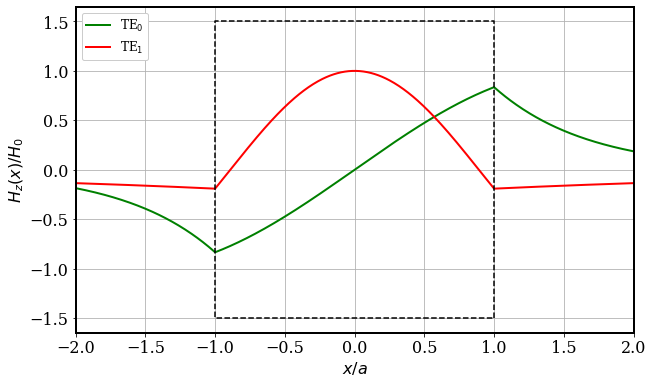

In [ ]:
font2 = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

figure2 = plt.figure(figsize=(10,6))
plt.rc('font',**font2)

# Código altamente baseado no repositório do professor Adolfo H.

Ho = 1
for i in range(int(MTE)):    
    phi = 0.5*(i*np.pi + np.arctan(alc_array[i]/kf_array[i]) - np.arctan(als_array[i]/kf_array[i]))
    Hzc2 = Ho *  np.sin(kf_array[i] * a  + phi) * np.exp(-alc_array[i] * (xte2 - a)) # cladding
    Hzc  = Ho *  np.sin(kf_array[i] * xte + phi)  # core
    Hzc1 = Ho * -np.sin(kf_array[i] * a  - phi) * np.exp(als_array[i] * (xte1 + a)) # substract 
    Hzc  = np.concatenate([Hzc1,Hzc,Hzc2])
    maxHzn = 1.0#np.max(abs(Hzc))
    plt.plot(np.concatenate([xte1,xte,xte2])/a, Hzc/maxHzn, label = 'TE$_{%d}$' %(i), linewidth = 2, color = colors[i+1])

plt.grid(True)
plt.xlim([-(h+1),h+1])
#plt.ylim([-1.5,1.5])
plt.plot(np.array([1, 1, -1, -1, 1]), np.array([-1.5, 1.5, 1.5, -1.5, -1.5]), 'k--', linewidth = 1.5)
plt.legend(loc = 'upper left', framealpha = 1, fontsize = 12)
plt.xlabel(r'$\it{x/a}$')
plt.ylabel(r'$\it{H_z(x)/H_0}$')

### Intensidade de campo (Ey)

Text(0, 0.5, '$\\it{E_y(x)/H_0}$')

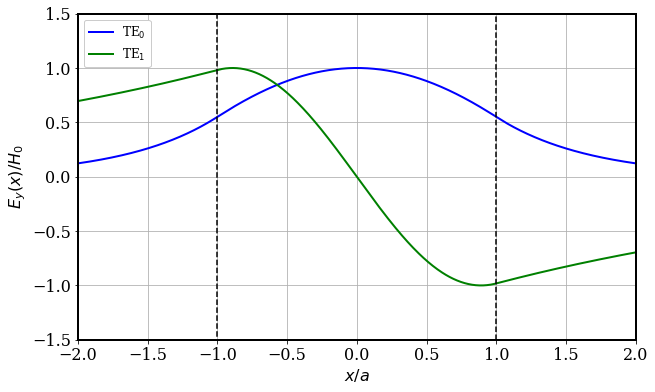

In [ ]:
font3 = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

figure2 = plt.figure(figsize=(10,6))
plt.rc('font',**font3)

# Código altamente baseado no repositório do professor Adolfo H.

Ho = 1
for i in range(MTE):    
    mi.append(omega*np.pi*4e-7/beta_array[i])
    phi = 0.5*(i*np.pi + np.arctan(alc_array[i]/kf_array[i]) - np.arctan(als_array[i]/kf_array[i]))    
    Eyc2 = Ho*omega*mi[i] * (1/alc_array[i]) * np.sin(kf_array[i] * a  + phi) * np.exp(-alc_array[i] * (xte2 - a)) # cladding
    Eyc  = Ho*omega*mi[i] * (1/kf_array[i])  * np.cos(kf_array[i] * xte + phi)  # core
    Eyc1 = Ho*omega*mi[i] * (1/als_array[i]) * np.sin(kf_array[i] * a  - phi) * np.exp(als_array[i] * (xte1 + a)) # substract
    Eyc = np.concatenate([Eyc1,Eyc,Eyc2])
    maxEyc = np.max(Eyc)
    plt.plot(np.concatenate([xte1,xte,xte2])/a, Eyc/maxEyc, label = 'TE$_{%d}$' %(i), linewidth = 2, color = colors[i])

plt.grid(True)
plt.xlim([-(h+1),h+1])
plt.ylim([-1.5,1.5])
plt.plot(np.array([1, 1, -1, -1, 1]), np.array([-1.5, 1.5, 1.5, -1.5, -1.5]), 'k--', linewidth = 1.5)
plt.legend(loc = 'upper left', framealpha = 1, fontsize = 12)
plt.xlabel(r'$\it{x/a}$')
plt.ylabel(r'$\it{E_y(x)/H_0}$')

# Modo TM

In [ ]:
leftTE = u*((nf/ns)**2*v+(nf/nc)**2*w)/(u**2-v*w*(nf/nc)**2*(nf/ns)**2)
leftTE[:-1][np.diff(leftTE) < -5] = np.nan    # NaN = Not a Number

rightTE = np.tan(2*u)
rightTE[:-1][np.diff(rightTE) < -5] = np.nan    # NaN = Not a Number

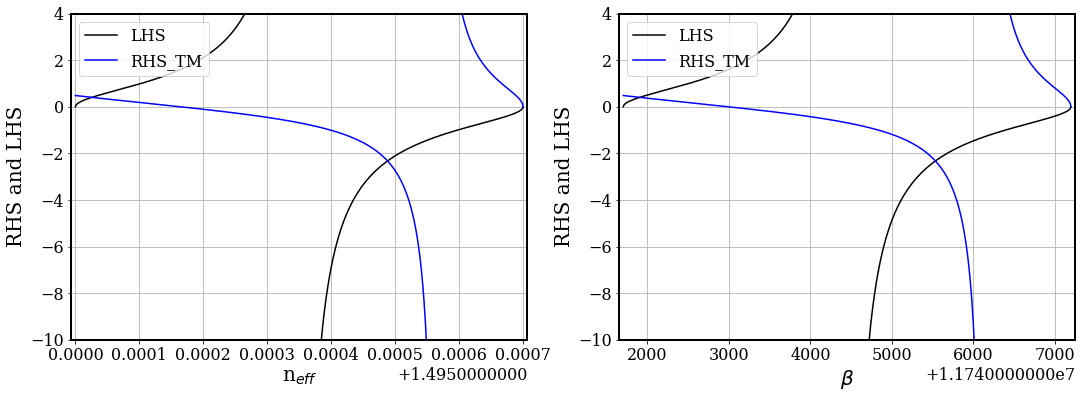

In [ ]:
vFc = 0.01  # View factor for graphing (set to 0 for original view)

font3 = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

figure1, axs = plt.subplots(1, 2, figsize=(18,6))
plt.rc('font', **font3)
plt.rc('axes', linewidth=2)

axs[0].plot(neff, leftTE, label = 'LHS', color = colors[6])
axs[0].plot(neff, rightTE, label = 'RHS_TM', color = colors[5])
axs[0].set_xlabel(r'n$_{eff}$', fontsize = 20)
axs[0].set_ylabel(r'RHS and LHS', fontsize = 20)
axs[0].set_xlim([ns - n_diff*vFc ,  nf + n_diff*vFc])
axs[0].set_ylim([-10,4])
axs[0].legend(loc = 'upper left', fontsize = 16)
axs[0].grid(True)

axs[1].plot(beta, leftTE, label = 'LHS', color = colors[6])
axs[1].plot(beta, rightTE, label = 'RHS_TM', color = colors[5])
axs[1].set_xlabel(r'$\beta$', fontsize = 20)
axs[1].set_ylabel(r'RHS and LHS', fontsize = 20)
axs[1].set_xlim([ns*k0 - n_diff*k0*vFc ,  nf*k0 + n_diff*k0*vFc])
axs[1].set_ylim([-10,4])
axs[1].legend(loc = 'upper left', fontsize = 16)
axs[1].grid(True)

### Índice de grupo (ng) para TM

In [ ]:
iterations = 1000
neff_grafico = np.array([1.4615, 1.497, 1.51, 1.517, 1.519])
neff_array = np.linspace(ns + 0.001*n_diff,  nf - 0.001*n_diff,  iterations)
index_Array = ( np.floor( (neff_grafico - ns) / ((nf-ns)/iterations) ) )
m = 1
ng = []

b_array = ( ((neff_array*k0)**2 - (k0*ns)**2)/((k0*nf)**2 -(k0*ns)**2) )
V_array = (m*np.pi + np.arctan(pc*np.sqrt((b_array + delta)/(1 - b_array))) + np.arctan(ps*np.sqrt(b_array/(1 - b_array))))/(2*np.sqrt(1 - b_array))
lambda_array = (2*np.pi/V_array)*a*AbNum

modes_array = index_Array.astype(int)
for j in modes_array:
    ng.append( neff_array[j] - np.gradient(neff_array, lambda_array)[j]*lmbd )
print('ng = ', ng)

ng =  [1.4737680492601557, 1.519569564160976, 1.527607256629212, 1.5278337738432322, 1.52560727539788]


### Intensidade de campo (Ez)

In [ ]:
Sctm = 2 # Scale
Prtm = 300 # Precision
h = 1
omega = k0*c0
mi = []

beta_array, neff_array, kf_array, als_array, alc_array, MTE = ds.adguide(nf, nc, ns, lmbd, a, 'TM')

xtm1 = np.linspace(-Sctm*a, -a, int(Prtm/2)) # Substract zone
xtm = np.linspace(-a, a, int(Prtm)) # Core zone
xtm2 =  np.linspace(a, Sctm*a, int(Prtm/2)) # Cladding zone 

Text(0, 0.5, '$\\it{E_z(x)/E_0}$')

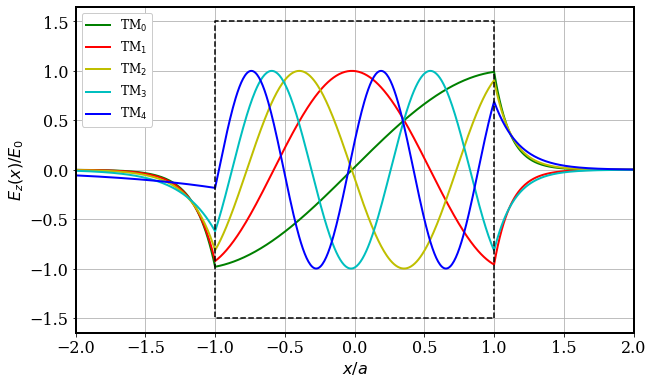

In [ ]:
font4 = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

figure2 = plt.figure(figsize=(10,6))
plt.rc('font',**font4)

# Código altamente baseado no repositório do professor Adolfo H.

Eo = 1
for i in range(int(MTE)):    
    phi = 0.5*(i*np.pi + np.arctan(pc*alc_array[i]/kf_array[i]) - np.arctan(ps*als_array[i]/kf_array[i]))
    Ezc2 = Eo *  np.sin(kf_array[i] * a  + phi) * np.exp(-alc_array[i] * (xtm2 - a)) # cladding
    Ezc  = Eo *  np.sin(kf_array[i] * xte + phi)  # core
    Ezc1 = Eo * -np.sin(kf_array[i] * a  - phi) * np.exp(als_array[i] * (xtm1 + a)) # substract 
    Ezc  = np.concatenate([Ezc1,Ezc,Ezc2])
    maxEzn = 1.0#np.max(abs(Hzc))
    plt.plot(np.concatenate([xtm1,xtm,xtm2])/a, Ezc/maxEzn, label = 'TM$_{%d}$' %(i), linewidth = 2, color = colors[i+1])

plt.grid(True)
plt.xlim([-(h+1),h+1])
plt.plot(np.array([1, 1, -1, -1, 1]), np.array([-1.5, 1.5, 1.5, -1.5, -1.5]), 'k--', linewidth = 1.5)
plt.legend(loc = 'upper left', framealpha = 1, fontsize = 12)
plt.xlabel(r'$\it{x/a}$')
plt.ylabel(r'$\it{E_z(x)/E_0}$')

### Intensidade de campo (Hy)

Text(0, 0.5, '$\\it{H_y(x)/E_0}$')

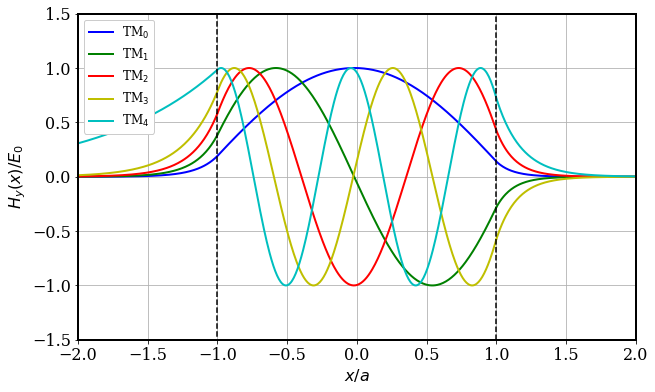

In [ ]:
font5 = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

figure2 = plt.figure(figsize=(10,6))
plt.rc('font',**font5)

# Código altamente baseado no repositório do professor Adolfo H.

Eo = 1
for i in range(MTE):    
    phi = 0.5*(i*np.pi + np.arctan(pc*alc_array[i]/kf_array[i]) - np.arctan(ps*als_array[i]/kf_array[i]))    
    Hyc2 = Eo*omega * (nc**2/alc_array[i]) * np.sin(kf_array[i] * a  + phi) * np.exp(-alc_array[i] * (xtm2 - a)) # cladding
    Hyc  = Eo*omega * (nf**2/kf_array[i])  * np.cos(kf_array[i] * xtm + phi)  # core
    Hyc1 = Eo*omega * (ns**2/als_array[i]) * np.sin(kf_array[i] * a  - phi) * np.exp(als_array[i] * (xtm1 + a)) # substract
    Hyc = np.concatenate([Hyc1,Hyc,Hyc2])
    maxHyc = np.max(Hyc)
    plt.plot(np.concatenate([xtm1,xtm,xtm2])/a, Hyc/maxHyc, label = 'TM$_{%d}$' %(i), linewidth = 2, color = colors[i])

plt.grid(True)
plt.xlim([-(h+1),h+1])
plt.ylim([-1.5,1.5])
plt.plot(np.array([1, 1, -1, -1, 1]), np.array([-1.5, 1.5, 1.5, -1.5, -1.5]), 'k--', linewidth = 1.5)
plt.legend(loc = 'upper left', framealpha = 1, fontsize = 12)
plt.xlabel(r'$\it{x/a}$')
plt.ylabel(r'$\it{H_y(x)/E_0}$')